# Numpy

In [7]:
import numpy as np

### 1. Linear equation 
Find x for Ax = b

In [15]:
A = np.array(
    [
         [ 1,  2,  3,  4],
         [ 3, -3,  8,  9],
         [ 5,  1, -4,  7],
         [-2,  5, -5,  1],
    ]
)
b = np.array([-5, 0, 10, -17])

**Tip:** have a look to np.set_printoptions

### 2. Cliping
Set all negatives values of array to zero

In [46]:
A = np.array(
    [
         [ 1,  2,  3,  4],
         [ 3, -3,  8,  9],
         [ 5,  1, -4,  7],
         [-2,  5, -5,  1],
    ]
)

### 3. Normalization
Normalize vector x (rescale values between 0, 1)

In [45]:
x = np.array([-4, 2, -1, 5, -10])

### 4. Standardize
Standardize image with shape (height, width, channels). \
Each channel should have zero mean and unit variance.

In [14]:
img = np.array([
     [[105, 121,  90], [109, 125,  94], [107, 125,  89], [106, 124, 86]],
     [[106, 123,  90], [107, 124,  91], [106, 125,  87], [108, 123, 81]],
     [[106, 123,  90], [107, 124,  91], [107, 126,  88], [107, 123, 85]],
     [[107, 125,  90], [106, 122,  89], [108, 126,  89], [103, 121, 83]]
])

### 5. Euclidian distance
Calculate distance matrix between two sets of pooints 

In [10]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[9, 8], [7, 6], [5, 4], [3, 2]])

# Pandas

In [47]:
import pandas as pd
url = "https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv"
df = pd.read_csv(url)

### Task 1
Find the name, age and sex of oldest passenger on Titanic

### Task 2
Show rows with passengers with age greater than 5 percantile and less than 95 percantile

### Task 3

Show correlation between features

### Task 4
Find average fare for survived and not survived passengers 

### Task 5
Vizualize boxplot to compare distributions of survived and not survived passengers.

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

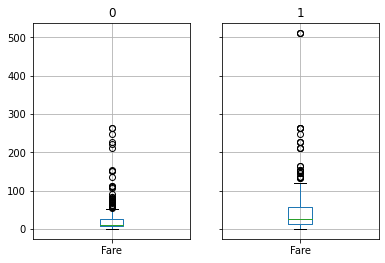